## Question Number 1

The question:
> Before you build any model, you want first to explore the raw data. What kind of analyses you would do? What kind of data pre-processing you would do? Please explain your logic and show the result of your preparatory analyses.

In this notebook we will load the datasets look inside and see how the datasets were structured and we will try to define the goals that we want to achieve later on.

## Importing Modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Loading datasets

Here in this notebooks I'll only show one dataset only (`QCM3.csv`) as the other ones are also in similar form and structure. 

In [2]:
df = pd.read_csv('./dataset/QCM3.csv', delimiter=';')

### 1. The data itself

Each datasets (there are 5) contains of 25 rows (5 for each alcohol types) and 15 columns. 5 of which show what types of alcohol it is and the rest is MIP and NP readings for 5 different alcohol concentrations (hence 2x5 -> 10 columns).

The data for other QCMs also looks like this and they're all pretty much identical in terms of structure and shape.

In [3]:
df

,0.799_0.201_MIP,0.799_0.201_NP,0.700_0.300_MIP,0.700_0.300_NP,0.600_0.400_MIP,0.600_0.400_NP,0.501_0.499_MIP,0.501_0.499_NP,0.400_0.600_MIP,0.400_0.600_NP,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,-14.43,-18.31,-24.64,-30.56,-38.62,-45.59,-54.89,-62.28,1,0,0,0,0
1,-9.69,-10.86,-16.73,-21.75,-28.47,-35.83,-43.65,-52.43,-61.92,-71.27,1,0,0,0,0
2,-12.07,-14.28,-21.54,-27.92,-35.19,-43.94,-52.04,-62.49,-71.97,-83.10,1,0,0,0,0
3,-14.21,-17.41,-25.91,-33.36,-41.29,-51.27,-59.94,-71.55,-81.51,-93.83,1,0,0,0,0
4,-16.57,-20.35,-29.97,-37.84,-47.03,-57.29,-67.13,-78.96,-90.01,-102.65,1,0,0,0,0
5,-75.61,-64.10,-122.08,-102.17,-174.79,-145.50,-214.69,-177.30,-250.83,-207.99,0,1,0,0,0
6,-76.28,-64.53,-123.40,-103.06,-174.74,-144.98,-206.75,-170.68,-240.14,-200.05,0,1,0,0,0
7,-76.96,-65.37,-124.50,-103.87,-169.93,-140.56,-200.89,-165.88,-232.82,-194.70,0,1,0,0,0
8,-78.29,-66.49,-125.78,-104.77,-165.42,-136.17,-196.10,-161.99,-226.89,-189.57,0,1,0,0,0
9,-79.62,-66.85,-126.61,-104.38,-162.73,-133.26,-194.87,-160.68,-221.33,-183.81,0,1,0,0,0


### 2. The balance in the datasets

Let's begin by checking the balance of categories/classes in our data. The data is pretty much perfectly balanced because each category/class are exactly 20% of total datasets. As can be seen bellow.

In [4]:
def get_proportions(df: pd.DataFrame):
    N_total = df.shape[0]
    for c in df.columns[-5:]:
        c_count = df.loc[df[c] == 1].shape[0]
        percentage = 100 * c_count/N_total
        print (f"  {c}\t: {percentage:4.1f}% ({c_count}/{N_total})")


print("Proportion of the dataset")
get_proportions(df)

Proportion of the dataset
  1-Octanol	: 20.0% (5/25)
  1-Propanol	: 20.0% (5/25)
  2-Butanol	: 20.0% (5/25)
  2-propanol	: 20.0% (5/25)
  1-isobutanol	: 20.0% (5/25)


As said, 20% for each alcohol type.

### 3. Collapsing the datasets

What I mean by collapsing the datasets is by combining previously separated MIP and NP columns (which are separated by alcohol concentration) into single MIP and single NP column. The final result we one is a model that can distinguish alcohol irrespective of its concetration. So if we want to see any patterns we might as well ignore the alcohol conccetrations.

In [5]:
def collapse_df(df: pd.DataFrame) -> pd.DataFrame:
    new_data = {
        'MIP': [],
        'NP': [],
        'ratio': []
    }
    for alcohol in df.columns[-5:]:
        new_data[alcohol] = []

    for l in range(5):
        df_l = df.loc[df[df.columns[-5+l]] == 1]
        np_l = df_l.to_numpy()
        for c in range(5):
            new_data['MIP'].extend(np_l[:, 2*c].tolist())
            new_data['NP'].extend(np_l[:, 2*c+1].tolist())
            new_data['ratio'].extend((np_l[:, 2*c]/np_l[:, 2*c+1]).tolist())

            alc_i = -5
            for alcohol in df.columns[-5:]:
                new_data[alcohol].extend(np_l[:, alc_i].tolist())
                alc_i += 1
    new_df = pd.DataFrame(new_data)
    return new_df


In [6]:
collapsed_df = collapse_df(df)
collapsed_df.head()

,MIP,NP,ratio,1-Octanol,1-Propanol,2-Butanol,2-propanol,1-isobutanol
0,-10.06,-10.62,0.947269,1.0,0.0,0.0,0.0,0.0
1,-9.69,-10.86,0.892265,1.0,0.0,0.0,0.0,0.0
2,-12.07,-14.28,0.845238,1.0,0.0,0.0,0.0,0.0
3,-14.21,-17.41,0.816198,1.0,0.0,0.0,0.0,0.0
4,-16.57,-20.35,0.814251,1.0,0.0,0.0,0.0,0.0


From above we can see clearly that all MIP and NP columns before collapsed into only one MIP and one NP column each. We keep alcohol type columns as is as it already in a very useful one-hot format for training stage on later notebooks.

In [7]:
print("Shape of collapsed DataFrame")
print(f"  rows    : {collapsed_df.shape[0]}")
print(f"  collumns: {collapsed_df.shape[1]}")

Shape of collapsed DataFrame
  rows    : 125
  collumns: 8


I also add `ratio` into our list of features as ratio of `MIP/NP`, we will take a look of it later.

### 4. MIP, NP, and MIP/NP distributions

Next, let's see if there's any patterns in their distributions that could distuingish from which alcohol its coming from

Text(0.5, 1.0, 'MIP boxplot')

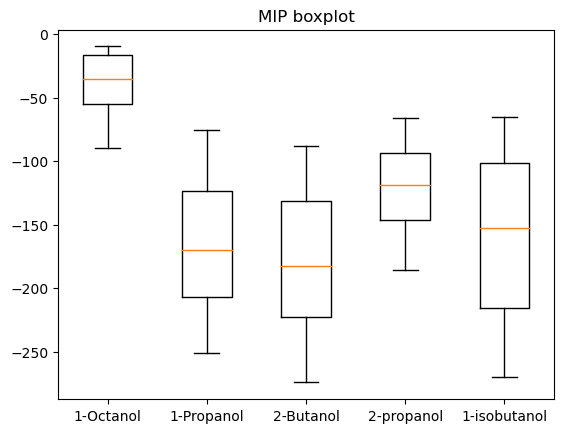

In [15]:
data = []
for alcohol in collapsed_df.columns[-5:]:
    alc_df = collapsed_df.loc[collapsed_df[alcohol] == 1]
    alc_np = alc_df['MIP'].to_numpy().ravel()
    data.append(alc_np)

plt.boxplot(data)
plt.xticks(np.arange(1, 5+1), df.columns[-5:])
plt.title('MIP boxplot')

Text(0.5, 1.0, 'NP boxplot')

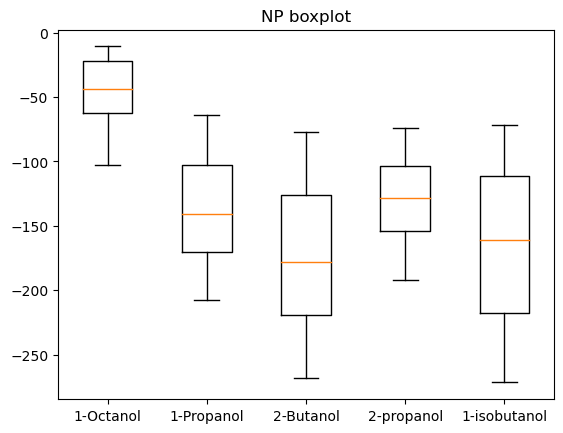

In [16]:
data = []
for alcohol in collapsed_df.columns[-5:]:
    alc_df = collapsed_df.loc[collapsed_df[alcohol] == 1]
    alc_np = alc_df['NP'].to_numpy().ravel()
    data.append(alc_np)

plt.boxplot(data)
plt.xticks(np.arange(1, 5+1), df.columns[-5:])
plt.title('NP boxplot')

The shape of the distributions MIP and NP are quite similar and it is quite hard to tell the alcohol appart, especially 1-Propanol and 2-Propanol (perhaps it makes sense since both are propanol) if we solely use NP as guide. 

Text(0.5, 1.0, 'MIP/NP boxplot')

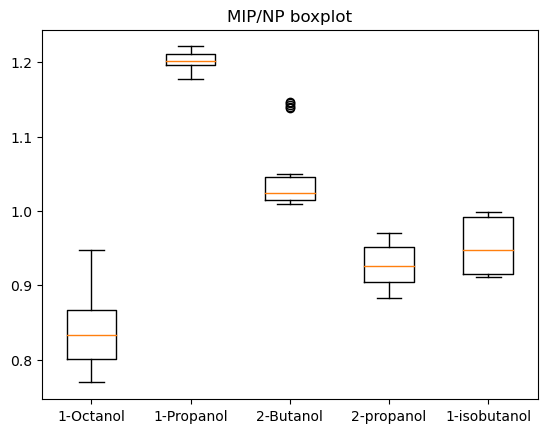

In [17]:
data = []
for alcohol in collapsed_df.columns[-5:]:
    alc_df = collapsed_df.loc[collapsed_df[alcohol] == 1]
    alc_np = alc_df['ratio'].to_numpy().ravel()
    data.append(alc_np)

plt.boxplot(data)
plt.xticks(np.arange(1, 5+1), df.columns[-5:])
plt.title('MIP/NP boxplot')

Compared to boxplot of MIP and NP, it is pretty clear that it is easier to distinguish the type of alcohol by using `MIP/NP` ratio instead. From this information it will be wise to include `MIP/NP` ratio as one of the features when we train models in the proceeding notebooks.